In [2]:
## input: 1. summarizedExperiement(SE) obj for chromVAR 2. Jaspar matrix 
## output: 1. motif x cell (z score) 2. plot: ranked           
source("./libs.R")

In [122]:
##------------------------------------------------------------
## inputs
##------------------------------------------------------------

input.chromVar.res.list <- readRDS(file = "../dat/output.jaspar.dev.res.Rdata")
input.chromVar.jaspar.z <- data.table(assays(input.chromVar.res.list$dev)$z,keep.rownames = T)
input.umap.res <- fread('../dat/1908/Islet_123.MNN_corrected.cluster_labels.filt.txt',header = T)
input.chromVar.jaspar.var <- fread("../dat/1908/output.jaspar.var.res.abcd.csv")

In [123]:
# filter unkonwn
input.umap.res <- input.umap.res %>% separate(cluster, into = c("cell_type_overall", 
    "subtype"), remove = F) %>% filter(cell_type_overall %in% c("alpha", "beta", 
    "delta", "gamma"))

input.umap.res[is.na(input.umap.res)] <- 0

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 600 rows [5, 18, 19, 50, 81, 114, 128, 147, 169, 175, 176, 190, 209, 250, 260, 345, 353, 376, 389, 413, ...].”

In [124]:
# aggregate data --------------------------------------------------------------
# melt
input.chromVar.jaspar.z.agg <- melt(input.chromVar.jaspar.z, id = "rn", variable.name = "barcodes", 
    value.name = "zval")

# add celltype
input.chromVar.jaspar.z.agg <- merge(input.chromVar.jaspar.z.agg, input.umap.res) 

# average over cell type
output.chromvar.jaspar.z.avg_by_ct <- input.chromVar.jaspar.z.agg[, .(zval_avg = mean(zval)), 
    by = .(rn, cell_type_overall)]
output.chromvar.jaspar.z.avg_by_ct <- output.chromvar.jaspar.z.avg_by_ct[, `:=`(zval_avg, 
    (zval_avg - min(zval_avg))/(max(zval_avg) - min(zval_avg))), by = .(rn)]
output.chromvar.jaspar.z.avg_by_ct <- dcast(output.chromvar.jaspar.z.avg_by_ct, rn ~ 
    cell_type_overall, value.var = "zval_avg")
setDF(output.chromvar.jaspar.z.avg_by_ct)
output.chromvar.jaspar.z.avg_by_ct <- output.chromvar.jaspar.z.avg_by_ct %>% separate(rn, 
    into = c("id", "name"), sep = "_") %>% select(-one_of("id")) %>% column_to_rownames("name")

In [125]:
dim(input.chromVar.jaspar.var%>%filter(variability>1.2))

[1] 82  7

In [143]:
cols.subtypes=c(alpha_1='darkred',alpha_2='lightpink',
               beta_1='darkgreen',beta_2='lightgreen',
               delta_1='orange',delta_2='gold',gamma='dodgerblue')
ColSideColors <- data.frame(celltypes=cols.subtypes[annodata$cluster],stringsAsFactors = F)
head(ColSideColors)

celltypes
darkred
darkred
darkred
darkred
darkred
darkred


In [58]:
setDF(input.chromVar.jaspar.z)

In [154]:
annodata <- input.umap.res 
setDF(input.chromVar.jaspar.z)
pd <- input.chromVar.jaspar.z[, c("rn", intersect(annodata$barcodes, colnames(input.chromVar.jaspar.z)[-1]))]
pd<- pd%>% column_to_rownames('rn')
annodata <- annodata %>% filter(barcodes %in% colnames(pd)) %>% arrange(cell_type_overall, 
    cluster)

rownames(pd) <- sub(".*_","",rownames(pd))
#pd <- pd[,annodata$barcodes]

pd<- pd[select.motifs[h$tree_row$order],annodata$barcodes]

In [ ]:
require(ComplexHeatmap)
Heatmap(pd[seq(ncol(pd), 1, by = -1),],use_raster = TRUE)#, name='mat',column_split = ColSideColors$celltypes, 
#    cluster_rows = F, )

In [155]:
pd[pd>3] <- 3
pd[pd < -3] <- -3 
heatmap3(pd[seq(ncol(pd),1,by = -1),],Rowv=NA, Colv = NA,labCol = rep("",ncol(pd)),
         ColSideColors = ColSideColors$celltypes) 

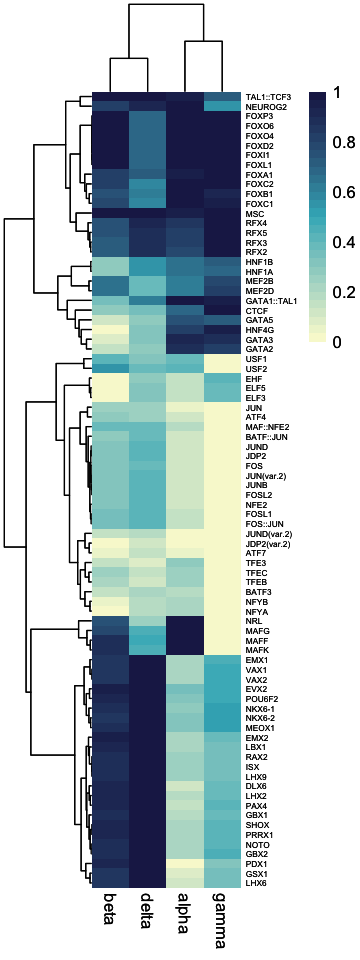

In [92]:
# heatmap -----------------------------------------------------------------
options(repr.plot.width = 3, repr.plot.height = 8)

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(T){
  h<-pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c('alpha','beta','delta','gamma')],scale = "none",
           cluster_cols = T, border_color = NA,
           show_rownames = T,fontsize_row = 5,
           color = cols.hm.avg.tf(30))
  print(h)
}            #clustering_method = "ward.D2",


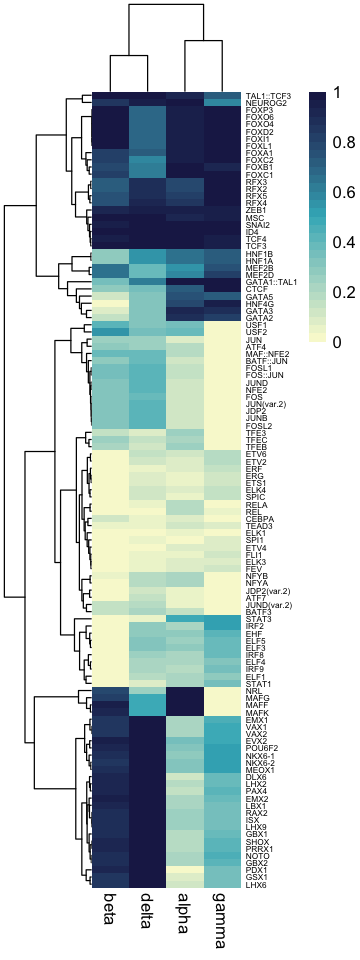

In [12]:
# heatmap -----------------------------------------------------------------
options(repr.plot.width = 3, repr.plot.height = 8)

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(T){
  pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c('alpha','beta','delta','gamma')],scale = "none",
           cluster_cols = T, border_color = NA,
           show_rownames = T,fontsize_row = 5,
           color = cols.hm.avg.tf(30))
  
}            #clustering_method = "ward.D2",


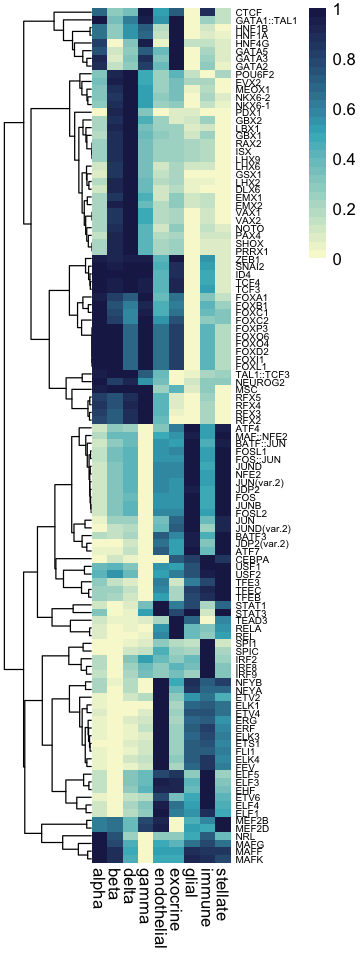

In [25]:
# heatmap -----------------------------------------------------------------

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(T){
  pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,4:5,7:9)],scale = "none",
           cluster_cols = F, border_color = NA,
           #clustering_method = "ward.D2",
           show_rownames = T,fontsize_row = 6,
           color = cols.hm.avg.tf(30))
  
}

In [ ]:
# heatmap -----------------------------------------------------------------

select.motifs <- (input.chromVar.jaspar.var%>%filter(variability>1.2))$name

if(F){
  pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,4:5,7:9)],scale = "none",
           cluster_cols = F, border_color = NA,
           #clustering_method = "ward.D2",
           show_rownames = T,fontsize_row = 6,
           color = cols.hm.avg.tf(30))
  
}

if(T){
  callback = function(hc, mat){
    #sv <- apply(mat, 1, which.max)
    dend =rev(as.dendrogram(hc))
    as.hclust(dend)
  }
  
png(filename = "overall_avg_motif_all_cell_type.png",height = 7.5,width = 3,units = 'in',res = 300)
pdf(file = "overall_avg_motif_all_cell_type.pdf",height = 7.5,width = 3)
  p <- pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,5,8,7,9,4)],scale = "none",
           cluster_cols = T,clustering_callback = callback,
           clustering_method = "ward.D2",treeheight_row = 0,
           show_rownames = T,fontsize_row = 5,border_color = NA,
           color = cols.hm.avg.tf(30))
  print(p)
dev.off()

}


pd <- output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,5,8,7,9,4)]
pd <- pd[p$tree_row$order,]
require(ggdendro)
hc <- hclust(dist(t(pd)))
dd <- rev(as.dendrogram(hc))
dd.reorder <- reorder(dd,1:9)
hc <- as.hclust(rev(dd.reorder))

hc$order
if(T){
  #dd.reorder <- reorder(dd,c(1,3,2,4,5,6,7,8,9))
  plot(dd.reorder)
  plot(dd)
}

pd <- pd[,hc$order]
p <- pheatmap(pd,scale = "none",cluster_rows = F,
              cluster_cols = F,clustering_callback = callback,
              clustering_method = "ward.D2",treeheight_row = 0,
              show_rownames = T,fontsize_row = 5,border_color = NA,
              color = cols.hm.avg.tf(30))
ggdendrogram(hc,  size = 2)+coord_flip()
saveRDS(list(pd=pd,hc=hc),'../dat/figdata/Fig1E.Rdata')

motif.list <- c("PDX1","RFX2","FOXO4","HNF1A","IRF2","ETS1","MEF2B","MAFK")
row_labs <- sapply(select.motifs, function(x) ifelse(x %in% motif.list,x,""))
png(filename = "overall_avg_motif_all_cell_type_hightlight.png",height = 7.5,width = 3,units = 'in',res = 300)
pdf(file = "overall_avg_motif_all_cell_type_hightlight.pdf",height = 7.5,width = 3)
pheatmap(output.chromvar.jaspar.z.avg_by_ct[select.motifs,c(1:3,6,5,8,7,9,4)],scale = "none",
         cluster_cols = F,clustering_callback = callback,
         clustering_method = "ward.D2",
         labels_row = row_labs,
         show_rownames = T,fontsize_row = 6,border_color = NA,
         color = cols.hm.avg.tf(30))
dev.off()
}




